# Loading drive

In [1]:
import os
import sys
import numpy as np

In [2]:
from google.colab import drive
# 4/vAFKK2XMqhFnE1xT-qBasfw57ybPZ0tPSdrKKA5CYUcvl9NlLtBXVoE
drive.mount('/content/gdrive', force_remount=True)

import os
os.chdir('/content/gdrive/My Drive/recsys/buyer_classification/baseline/')

Mounted at /content/gdrive


In [3]:
!pip3 install numpy-indexed

In [4]:
import os
os.chdir('/content/gdrive/My Drive/recsys/buyer_classification/baseline/')

In [ ]:
!wget http://s3-eu-west-1.amazonaws.com/yc-rdata/yoochoose-data.7z

--2020-09-05 19:41:08--  http://s3-eu-west-1.amazonaws.com/yc-rdata/yoochoose-data.7z
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.96.194
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.96.194|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 287211932 (274M) [application/octet-stream]
Saving to: ‘yoochoose-data.7z.4’

yoochoose-data.7z.4 100%[===================>] 273.91M  60.2MB/s    in 4.5s    

2020-09-05 19:41:13 (60.7 MB/s) - ‘yoochoose-data.7z.4’ saved [287211932/287211932]



In [ ]:
!7z x yoochoose-data.7z.1


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Sca        1 file, 287211932 bytes (274 MiB)

Extracting archive: yoochoose-data.7z.1
--
Path = yoochoose-data.7z.1
Type = 7z
Physical Size = 287211932
Headers Size = 255
Method = LZMA:24
Solid = +
Blocks = 2

    
Would you like to replace the existing file:
  Path:     ./yoochoose-buys.dat
  Size:     55583744 bytes (54 MiB)
  Modified: 2020-08-16 18:39:25
with the file from archive:
  Path:     yoochoose-buys.dat
  Size:     55583744 bytes (54 MiB)
  Modified: 2014-11-05 14:25:04
? (Y)es / (N)o / (A)lways / (S)kip all / A(u)to rename all / (Q)uit? A

  0% - yoochoose-buys.da                          1% - yoochoose-buys.da                          2% - yoochoose-buys.da                          2% 1 - yoochoose-clicks.da                              3%

In [ ]:
!head yoochoose-clicks.dat

1,2014-04-07T10:51:09.277Z,214536502,0
1,2014-04-07T10:54:09.868Z,214536500,0
1,2014-04-07T10:54:46.998Z,214536506,0
1,2014-04-07T10:57:00.306Z,214577561,0
2,2014-04-07T13:56:37.614Z,214662742,0
2,2014-04-07T13:57:19.373Z,214662742,0
2,2014-04-07T13:58:37.446Z,214825110,0
2,2014-04-07T13:59:50.710Z,214757390,0
2,2014-04-07T14:00:38.247Z,214757407,0
2,2014-04-07T14:02:36.889Z,214551617,0


In [ ]:
import pandas as pd
dc = pd.read_csv('../yoochoose-clicks.dat',sep=',',header=None)
dc

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0                         1          2  3
0                1  2014-04-07T10:51:09.277Z  214536502  0
1                1  2014-04-07T10:54:09.868Z  214536500  0
2                1  2014-04-07T10:54:46.998Z  214536506  0
3                1  2014-04-07T10:57:00.306Z  214577561  0
4                2  2014-04-07T13:56:37.614Z  214662742  0
...            ...                       ...        ... ..
33003939  11299809  2014-09-25T09:33:22.412Z  214819412  S
33003940  11299809  2014-09-25T09:43:52.821Z  214830939  S
33003941  11299811  2014-09-24T19:02:09.741Z  214854855  S
33003942  11299811  2014-09-24T19:02:11.894Z  214854838  S
33003943  11299811  2014-09-24T19:02:25.146Z  214848658  S

[33003944 rows x 4 columns]

In [ ]:
dc.columns = ['session_id','timestamp','item_id','category']
dc

session_id                 timestamp    item_id category
0                  1  2014-04-07T10:51:09.277Z  214536502        0
1                  1  2014-04-07T10:54:09.868Z  214536500        0
2                  1  2014-04-07T10:54:46.998Z  214536506        0
3                  1  2014-04-07T10:57:00.306Z  214577561        0
4                  2  2014-04-07T13:56:37.614Z  214662742        0
...              ...                       ...        ...      ...
33003939    11299809  2014-09-25T09:33:22.412Z  214819412        S
33003940    11299809  2014-09-25T09:43:52.821Z  214830939        S
33003941    11299811  2014-09-24T19:02:09.741Z  214854855        S
33003942    11299811  2014-09-24T19:02:11.894Z  214854838        S
33003943    11299811  2014-09-24T19:02:25.146Z  214848658        S

[33003944 rows x 4 columns]

In [ ]:
train_df = dc

# Data Preparing

# Save/Load processed final


In [ ]:
import pandas as pd

base_path = '../'
train_df = pd.read_csv(base_path+"train_df_labels.csv")

train_df = train_df[list(train_df)[1:]]
train_df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


session_id                         timestamp  ...  price_dist_avg  label
0                  1  2014-04-07 10:51:09.277000+00:00  ...             0.0  False
1                  1  2014-04-07 10:54:09.868000+00:00  ...             0.0  False
2                  1  2014-04-07 10:54:46.998000+00:00  ...             0.0  False
3                  1  2014-04-07 10:57:00.306000+00:00  ...             0.0  False
4                  2  2014-04-07 13:56:37.614000+00:00  ...             0.0  False
...              ...                               ...  ...             ...    ...
23768654    11299813  2014-09-24 16:34:32.102000+00:00  ...           157.0  False
23768655    11299813  2014-09-24 16:34:57.172000+00:00  ...           157.0  False
23768656    11299813  2014-09-24 16:35:59.016000+00:00  ...           157.0  False
23768657    11299814  2014-09-29 16:54:36.153000+00:00  ...             0.0  False
23768658    11299808  2014-09-27 15:23:24.869000+00:00  ...             0.0  False

[23768659 rows x 15 columns]

In [ ]:
valid_df = pd.read_csv(base_path + "valid_df_labels.csv")

valid_df = valid_df[list(valid_df)[0:]]
valid_df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0  session_id  ... price_dist_avg  label
0               126          38  ...           0.00  False
1               127          38  ...           0.00  False
2               128          38  ...           0.00  False
3               172          54  ...         -52.50  False
4               173          54  ...         -96.25  False
...             ...         ...  ...            ...    ...
2641233    33003939    11299809  ...          26.50  False
2641234    33003940    11299809  ...           0.00  False
2641235    33003941    11299811  ...           0.00  False
2641236    33003942    11299811  ...           0.00  False
2641237    33003943    11299811  ...          52.50  False

[2641238 rows x 15 columns]

In [ ]:
import pandas as pd
base_path = '../'
test_df = pd.read_csv(base_path + "test_df_final.csv")

test_df = test_df[list(test_df)[0:]]
test_df

session_id                         timestamp  ...  item_id_prob  label
0                38  2014-04-04 05:16:09.704000+00:00  ...      0.026000  False
1                38  2014-04-04 05:16:55.163000+00:00  ...      0.096774  False
2                38  2014-04-04 05:17:34.463000+00:00  ...      0.026000  False
3                54  2014-04-01 07:33:07.173000+00:00  ...      0.004000  False
4                54  2014-04-01 07:40:28.688000+00:00  ...      0.058000  False
...             ...                               ...  ...           ...    ...
2641239    11299809  2014-09-25 09:33:22.412000+00:00  ...      0.036000  False
2641240    11299809  2014-09-25 09:43:52.821000+00:00  ...      0.038000  False
2641241    11299811  2014-09-24 19:02:09.741000+00:00  ...      0.070000  False
2641242    11299811  2014-09-24 19:02:11.894000+00:00  ...      0.076000  False
2641243    11299811  2014-09-24 19:02:25.146000+00:00  ...      0.040000  False

[2641244 rows x 13 columns]

In [ ]:
test_df.shape

(3201607, 15)

In [ ]:
cols = ['session_id','timestamp','item_id','category','label']


In [ ]:
train_df = train_df[cols]
valid_df = valid_df[cols]

In [ ]:
test_df_sizes = test_df.groupby("session_id").agg('size').to_dict()

In [ ]:
import pickle
  
pickle.dump(test_df_sizes,open("test_df_sizes.bin","wb"))

In [ ]:
test_df[test_df.larger_than_one == False]

session_id                         timestamp  ...  label  larger_than_one
51              232  2014-04-01 19:40:17.444000+00:00  ...  False            False
265            1241  2014-04-06 10:45:44.665000+00:00  ...  False            False
307            1403  2014-04-02 20:09:38.045000+00:00  ...  False            False
328            1341  2014-04-06 12:15:14.349000+00:00  ...  False            False
358            1663  2014-04-02 15:56:52.346000+00:00  ...  False            False
...             ...                               ...  ...    ...              ...
3183370    11300034  2014-09-23 09:35:22.419000+00:00  ...  False            False
3183371    11300373  2014-09-24 11:55:16.548000+00:00  ...  False            False
3183372    11300588  2014-09-27 16:12:41.677000+00:00  ...  False            False
3183373    11300698  2014-09-27 10:22:03.246000+00:00  ...  False            False
3183397    11299559  2014-09-29 10:46:00.648000+00:00  ...  False            False

[126302 rows x 6 columns]

## Subset data

In [ ]:
sessions_id = dc.session_id.unique()
sessions_id.shape

(9249729,)

In [ ]:
import random
total = sessions_id.shape[0]
subset = int(total)
subset_sids = sessions_id[np.random.choice(total, subset)]
subset_sids.shape

(9249729,)

In [ ]:
sessions_id = subset_sids

In [ ]:
sessions_id

array([5594233, 3429666,   45101, ..., 9439511, 2553674, 3000551])

## Load split

In [ ]:
train_sids = np.load("train_sids.npy")
valid_sids = np.load("valid_sids.npy")
test_sids = np.load("test_sids.npy")

In [ ]:
train_df = dc[dc.session_id.isin(train_sids)]
train_df

session_id                 timestamp    item_id category
0                  1  2014-04-07T10:51:09.277Z  214536502        0
1                  1  2014-04-07T10:54:09.868Z  214536500        0
2                  1  2014-04-07T10:54:46.998Z  214536506        0
3                  1  2014-04-07T10:57:00.306Z  214577561        0
4                  2  2014-04-07T13:56:37.614Z  214662742        0
...              ...                       ...        ...      ...
33003939    11299809  2014-09-25T09:33:22.412Z  214819412        S
33003940    11299809  2014-09-25T09:43:52.821Z  214830939        S
33003941    11299811  2014-09-24T19:02:09.741Z  214854855        S
33003942    11299811  2014-09-24T19:02:11.894Z  214854838        S
33003943    11299811  2014-09-24T19:02:25.146Z  214848658        S

[24763736 rows x 4 columns]

In [ ]:
valid_df = dc[dc.session_id.isin(valid_sids)]
valid_df

session_id                 timestamp    item_id category
17                 7  2014-04-02T06:38:53.104Z  214826835        0
18                 7  2014-04-02T06:39:05.854Z  214826715        0
19                 8  2014-04-06T08:49:58.728Z  214838855        0
20                 8  2014-04-06T08:52:12.647Z  214838855        0
36                12  2014-04-02T10:30:13.176Z  214717867        0
...              ...                       ...        ...      ...
33003912    11299822  2014-09-28T04:38:10.567Z  214859857        S
33003913    11299823  2014-09-29T07:06:28.550Z  214858914        S
33003923    11299819  2014-09-25T08:29:28.743Z  214854855        S
33003924    11299819  2014-09-25T08:30:27.345Z  214854815        S
33003925    11299819  2014-09-25T08:31:39.129Z  214854815        S

[8240208 rows x 4 columns]

In [ ]:
test_df = dc[dc.session_id.isin(test_sids)]
test_df

session_id                 timestamp    item_id category
19                 8  2014-04-06T08:49:58.728Z  214838855        0
20                 8  2014-04-06T08:52:12.647Z  214838855        0
36                12  2014-04-02T10:30:13.176Z  214717867        0
37                12  2014-04-02T10:33:12.621Z  214717867        0
41                14  2014-04-01T10:09:01.362Z  214577732        0
...              ...                       ...        ...      ...
33003912    11299822  2014-09-28T04:38:10.567Z  214859857        S
33003913    11299823  2014-09-29T07:06:28.550Z  214858914        S
33003923    11299819  2014-09-25T08:29:28.743Z  214854855        S
33003924    11299819  2014-09-25T08:30:27.345Z  214854815        S
33003925    11299819  2014-09-25T08:31:39.129Z  214854815        S

[6593988 rows x 4 columns]

## Split in train, valid and test

In [ ]:
from sklearn.model_selection import train_test_split

 
train, test = train_test_split(sessions_id, test_size=0.2, random_state=1)
train, valid  = train_test_split(sessions_id, test_size=0.25, random_state=1)

In [ ]:
print(train.shape,test.shape,valid.shape)

(6937296,) (1849946,) (2312433,)


In [ ]:
np.save("train_sids.npy",train)
np.save("valid_sids.npy",valid)
np.save("test_sids.npy",test)

In [ ]:
train_df = dc[dc.session_id.isin(train)]
train_df

session_id                 timestamp    item_id category
0                  1  2014-04-07T10:51:09.277Z  214536502        0
1                  1  2014-04-07T10:54:09.868Z  214536500        0
2                  1  2014-04-07T10:54:46.998Z  214536506        0
3                  1  2014-04-07T10:57:00.306Z  214577561        0
4                  2  2014-04-07T13:56:37.614Z  214662742        0
...              ...                       ...        ...      ...
33003939    11299809  2014-09-25T09:33:22.412Z  214819412        S
33003940    11299809  2014-09-25T09:43:52.821Z  214830939        S
33003941    11299811  2014-09-24T19:02:09.741Z  214854855        S
33003942    11299811  2014-09-24T19:02:11.894Z  214854838        S
33003943    11299811  2014-09-24T19:02:25.146Z  214848658        S

[24763736 rows x 4 columns]

In [ ]:
valid_df = dc[dc.session_id.isin(valid)]
valid_df

session_id                 timestamp    item_id category
17                 7  2014-04-02T06:38:53.104Z  214826835        0
18                 7  2014-04-02T06:39:05.854Z  214826715        0
19                 8  2014-04-06T08:49:58.728Z  214838855        0
20                 8  2014-04-06T08:52:12.647Z  214838855        0
36                12  2014-04-02T10:30:13.176Z  214717867        0
...              ...                       ...        ...      ...
33003912    11299822  2014-09-28T04:38:10.567Z  214859857        S
33003913    11299823  2014-09-29T07:06:28.550Z  214858914        S
33003923    11299819  2014-09-25T08:29:28.743Z  214854855        S
33003924    11299819  2014-09-25T08:30:27.345Z  214854815        S
33003925    11299819  2014-09-25T08:31:39.129Z  214854815        S

[8240208 rows x 4 columns]

In [ ]:
test_df = dc[dc.session_id.isin(test)]
test_df

NameError: ignored

## Add label

In [ ]:
import pandas as pd

db_path = '../yoochoose-buys.dat'
b_cols = ['session_id','timestamp','item_id','price','quantity']
db = pd.read_csv(db_path,sep=',',header=None,names=b_cols)
db = db[db.quantity != 0] # remove noise data
db = db[db.price != 0] # remove noise data
db


session_id                 timestamp    item_id  price  quantity
0            420374  2014-04-06T18:44:58.314Z  214537888  12462         1
1            420374  2014-04-06T18:44:58.325Z  214537850  10471         1
2            281626  2014-04-06T09:40:13.032Z  214535653   1883         1
3            420368  2014-04-04T06:13:28.848Z  214530572   6073         1
4            420368  2014-04-04T06:13:28.858Z  214835025   2617         1
...             ...                       ...        ...    ...       ...
1150748    11368701  2014-09-26T07:52:51.357Z  214849809    554         2
1150749    11368691  2014-09-25T09:37:44.206Z  214700002   6806         5
1150750    11523941  2014-09-25T06:14:47.965Z  214578011  14556         1
1150751    11423202  2014-09-26T18:49:34.024Z  214849164   1046         1
1150752    11423202  2014-09-26T18:49:34.026Z  214560500   5549         1

[540723 rows x 5 columns]

In [ ]:
train_df['label'] = train_df.session_id.isin(db.session_id)
train_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


session_id                 timestamp    item_id category  label
0                  1  2014-04-07T10:51:09.277Z  214536502        0  False
1                  1  2014-04-07T10:54:09.868Z  214536500        0  False
2                  1  2014-04-07T10:54:46.998Z  214536506        0  False
3                  1  2014-04-07T10:57:00.306Z  214577561        0  False
4                  2  2014-04-07T13:56:37.614Z  214662742        0  False
...              ...                       ...        ...      ...    ...
33003939    11299809  2014-09-25T09:33:22.412Z  214819412        S  False
33003940    11299809  2014-09-25T09:43:52.821Z  214830939        S  False
33003941    11299811  2014-09-24T19:02:09.741Z  214854855        S  False
33003942    11299811  2014-09-24T19:02:11.894Z  214854838        S  False
33003943    11299811  2014-09-24T19:02:25.146Z  214848658        S  False

[24763736 rows x 5 columns]

In [ ]:
valid_df['label'] = valid_df.session_id.isin(db.session_id)
valid_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


session_id                 timestamp    item_id category  label
17                 7  2014-04-02T06:38:53.104Z  214826835        0  False
18                 7  2014-04-02T06:39:05.854Z  214826715        0  False
19                 8  2014-04-06T08:49:58.728Z  214838855        0  False
20                 8  2014-04-06T08:52:12.647Z  214838855        0  False
36                12  2014-04-02T10:30:13.176Z  214717867        0   True
...              ...                       ...        ...      ...    ...
33003912    11299822  2014-09-28T04:38:10.567Z  214859857        S  False
33003913    11299823  2014-09-29T07:06:28.550Z  214858914        S  False
33003923    11299819  2014-09-25T08:29:28.743Z  214854855        S  False
33003924    11299819  2014-09-25T08:30:27.345Z  214854815        S  False
33003925    11299819  2014-09-25T08:31:39.129Z  214854815        S  False

[8240208 rows x 5 columns]

In [ ]:
test_df['label'] = test_df.session_id.isin(db.session_id)
test_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


session_id                        timestamp  ...  category  label
19                 8 2014-04-06 08:49:58.728000+00:00  ...         0  False
20                 8 2014-04-06 08:52:12.647000+00:00  ...         0  False
36                12 2014-04-02 10:30:13.176000+00:00  ...         0   True
37                12 2014-04-02 10:33:12.621000+00:00  ...         0   True
41                14 2014-04-01 10:09:01.362000+00:00  ...         0  False
...              ...                              ...  ...       ...    ...
33003912    11299822 2014-09-28 04:38:10.567000+00:00  ...         S  False
33003913    11299823 2014-09-29 07:06:28.550000+00:00  ...         S  False
33003923    11299819 2014-09-25 08:29:28.743000+00:00  ...         S  False
33003924    11299819 2014-09-25 08:30:27.345000+00:00  ...         S  False
33003925    11299819 2014-09-25 08:31:39.129000+00:00  ...         S  False

[6593988 rows x 5 columns]

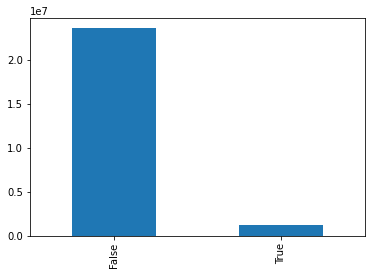

In [ ]:
train_df.label.value_counts().plot.bar()

## Remove Label

In [ ]:
# train_df = train_df.drop("label",axis=1)
# train_df.head(2)

session_id                 timestamp    item_id category
0           1  2014-04-07T10:51:09.277Z  214536502        0
1           1  2014-04-07T10:54:09.868Z  214536500        0

# Data Construct

## Convert to Datetime

In [ ]:
train_df['timestamp'] = pd.to_datetime(train_df.timestamp)
train_df

session_id                        timestamp  ...  price_dist_avg  label
0                  1 2014-04-07 10:51:09.277000+00:00  ...             0.0  False
1                  1 2014-04-07 10:54:09.868000+00:00  ...             0.0  False
2                  1 2014-04-07 10:54:46.998000+00:00  ...             0.0  False
3                  1 2014-04-07 10:57:00.306000+00:00  ...             0.0  False
4                  2 2014-04-07 13:56:37.614000+00:00  ...             0.0  False
...              ...                              ...  ...             ...    ...
23768654    11299813 2014-09-24 16:34:32.102000+00:00  ...           157.0  False
23768655    11299813 2014-09-24 16:34:57.172000+00:00  ...           157.0  False
23768656    11299813 2014-09-24 16:35:59.016000+00:00  ...           157.0  False
23768657    11299814 2014-09-29 16:54:36.153000+00:00  ...             0.0  False
23768658    11299808 2014-09-27 15:23:24.869000+00:00  ...             0.0  False

[23768659 rows x 15 columns]

In [ ]:
valid_df['timestamp'] = pd.to_datetime(valid_df.timestamp)
valid_df

Unnamed: 0  session_id  ... price_dist_avg  label
0               126          38  ...           0.00  False
1               127          38  ...           0.00  False
2               128          38  ...           0.00  False
3               172          54  ...         -52.50  False
4               173          54  ...         -96.25  False
...             ...         ...  ...            ...    ...
2641233    33003939    11299809  ...          26.50  False
2641234    33003940    11299809  ...           0.00  False
2641235    33003941    11299811  ...           0.00  False
2641236    33003942    11299811  ...           0.00  False
2641237    33003943    11299811  ...          52.50  False

[2641238 rows x 15 columns]

In [ ]:
test_df['timestamp'] = pd.to_datetime(test_df.timestamp)
test_df

session_id                        timestamp  ...  item_id_prob  label
0                38 2014-04-04 05:16:09.704000+00:00  ...      0.026000  False
1                38 2014-04-04 05:16:55.163000+00:00  ...      0.096774  False
2                38 2014-04-04 05:17:34.463000+00:00  ...      0.026000  False
3                54 2014-04-01 07:33:07.173000+00:00  ...      0.004000  False
4                54 2014-04-01 07:40:28.688000+00:00  ...      0.058000  False
...             ...                              ...  ...           ...    ...
2641239    11299809 2014-09-25 09:33:22.412000+00:00  ...      0.036000  False
2641240    11299809 2014-09-25 09:43:52.821000+00:00  ...      0.038000  False
2641241    11299811 2014-09-24 19:02:09.741000+00:00  ...      0.070000  False
2641242    11299811 2014-09-24 19:02:11.894000+00:00  ...      0.076000  False
2641243    11299811 2014-09-24 19:02:25.146000+00:00  ...      0.040000  False

[2641244 rows x 13 columns]

## Second Stage

In [ ]:
!pip3 install swifter
!pip3 install numpy-indexed

     |████████████████████████████████| 634kB 6.0MB/s eta 0:00:01
     |████████████████████████████████| 471kB 8.2MB/s 
     |████████████████████████████████| 542kB 17.3MB/s 
     |████████████████████████████████| 92kB 8.9MB/s 
     |████████████████████████████████| 17.2MB 261kB/s 
     |████████████████████████████████| 23.1MB 1.4MB/s 
     |████████████████████████████████| 2.9MB 55.0MB/s 
     |████████████████████████████████| 1.3MB 57.5MB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 133kB 55.1MB/s 
     |████████████████████████████████| 71kB 9.3MB/s 
     |████████████████████████████████| 204kB 54.3MB/s 
     |████████████████████████████████| 143kB 57.7MB/s 
     |████████████████████████████████| 296kB 56.3MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 102kB 11.7MB/s 
  Created wheel for swifter: filename=swifter-1.0

### Create Items Probs

In [ ]:
import pickle
item_id_probs =  pickle.load(open("item_id_probs.pickle",'rb'))
item_id_probs

{214507224: 0.0,
 214507226: 0.0,
 214507239: 0.0,
 214507256: 0.0,
 214507331: 0.016,
 214507365: 0.044,
 214507385: 0.06615776081424936,
 214507387: 0.07526881720430108,
 214507408: 0.07194244604316546,
 214507415: 0.034,
 214507445: 0.08223684210526316,
 214507447: 0.07,
 214507477: 0.0,
 214507479: 0.0,
 214507481: 0.0,
 214507492: 0.036,
 214507500: 0.0,
 214507556: 0.07213114754098361,
 214507610: 0.07021791767554479,
 214507678: 0.0,
 214507708: 0.05573770491803279,
 214507723: 0.0,
 214507802: 0.06103286384976526,
 214507897: 0.0,
 214507927: 0.0,
 214507946: 0.0,
 214507948: 0.0,
 214507982: 0.0,
 214508000: 0.0,
 214508015: 0.0,
 214508027: 0.039285714285714285,
 214508040: 0.0,
 214508066: 0.0,
 214508113: 0.0,
 214508137: 0.0,
 214508143: 0.0,
 214508154: 0.0,
 214508167: 0.0,
 214508203: 0.0,
 214508212: 0.0,
 214508214: 0.0,
 214508225: 0.07633587786259542,
 214508237: 0.002512562814070352,
 214508244: 0.07967032967032966,
 214508287: 0.016,
 214508291: 0.0,
 214508304: 0

In [ ]:
%%time

import swifter
from tqdm import tqdm
import pandas as pd
from collections import defaultdict
# tqdm.pandas(desc="") last tqdm
tqdm.pandas()

df_summary = train_df
session_id_t = df_summary.groupby('session_id').timestamp.progress_apply(lambda x: x.iloc[0]).to_dict()
df_summary['session_t'] = df_summary['session_id'].map(session_id_t)
df_summary

100%|██████████| 6659804/6659804 [06:48<00:00, 16313.27it/s]


CPU times: user 7min 18s, sys: 3.33 s, total: 7min 21s
Wall time: 7min 19s


In [ ]:
item_id_sessions = df_summary.groupby('item_id').progress_apply(lambda x: list(zip(x['session_id'].values, x['session_t'].values, x['label'].values))).to_dict()
item_id_sessions

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
MAX_T = 25

item_id_probs = dict()
i = 0
for key,value in item_id_sessions.items():
  if i % 1000 == 0:
    total = len(item_id_sessions)
    print("Current i = ",(i/total) * 100)
  value = list(set(value))[:500]
  item_id_sessions[key] = sorted(value, key = lambda x: x[1])[:MAX_T]

  labels = list(map(lambda x: 1 if x[2] == True else 0,value))
  item_id_probs[key] = np.mean(labels)
  i+=1
item_id_sessions

Current i =  0.0
Current i =  1.987083954297069
Current i =  3.974167908594138
Current i =  5.961251862891207
Current i =  7.948335817188276
Current i =  9.935419771485346
Current i =  11.922503725782414
Current i =  13.909587680079483
Current i =  15.896671634376553
Current i =  17.883755588673623
Current i =  19.870839542970693
Current i =  21.85792349726776
Current i =  23.84500745156483
Current i =  25.832091405861895
Current i =  27.819175360158965
Current i =  29.806259314456035
Current i =  31.793343268753105
Current i =  33.780427223050175
Current i =  35.767511177347245
Current i =  37.754595131644315
Current i =  39.741679085941385
Current i =  41.72876304023845
Current i =  43.71584699453552
Current i =  45.70293094883259
Current i =  47.69001490312966
Current i =  49.67709885742673
Current i =  51.66418281172379
Current i =  53.65126676602087
Current i =  55.63835072031793
Current i =  57.62543467461501
Current i =  59.61251862891207
Current i =  61.59960258320915
Current i

{214507224: [(2428382,
   numpy.datetime64('2014-05-07T07:43:17.982000000'),
   False),
  (2428383, numpy.datetime64('2014-05-07T13:29:40.827000000'), False),
  (4000944, numpy.datetime64('2014-06-02T08:50:09.758000000'), False),
  (4220917, numpy.datetime64('2014-06-05T14:53:58.268000000'), False),
  (4765238, numpy.datetime64('2014-06-11T12:46:32.207000000'), False),
  (4538804, numpy.datetime64('2014-06-16T12:05:08.623000000'), False)],
 214507226: [(966402,
   numpy.datetime64('2014-04-17T08:47:02.210000000'),
   False),
  (966403, numpy.datetime64('2014-04-17T12:07:40.390000000'), False),
  (2428382, numpy.datetime64('2014-05-07T07:43:17.982000000'), False),
  (2428384, numpy.datetime64('2014-05-08T12:38:32.090000000'), False),
  (4765238, numpy.datetime64('2014-06-11T12:46:32.207000000'), False)],
 214507239: [(1151253,
   numpy.datetime64('2014-04-16T07:41:50.688000000'),
   False)],
 214507256: [(4765238,
   numpy.datetime64('2014-06-11T12:46:32.207000000'),
   False)],
 214507

In [ ]:
train_df = train_df.drop("session_t",axis=1)
train_df.head(2)

session_id                        timestamp  ...  price_dist_avg  label
0           1 2014-04-07 10:51:09.277000+00:00  ...             0.0  False
1           1 2014-04-07 10:54:09.868000+00:00  ...             0.0  False

[2 rows x 15 columns]

### Save item_id_probs

In [ ]:
import pickle

pickle.dump(item_id_probs, open("item_id_probs.pickle",'wb'))

In [ ]:
train_df.head()

### Create Sessions_Buyers

In [ ]:
import pandas as pd

db_path = '../yoochoose-buys.dat'
b_cols = ['session_id','timestamp','item_id','price','quantity']
db = pd.read_csv(db_path,sep=',',header=None,names=b_cols)
db = db[db.quantity != 0] # remove noise data
db = db[db.price != 0] # remove noise data
db


session_id                 timestamp    item_id  price  quantity
0            420374  2014-04-06T18:44:58.314Z  214537888  12462         1
1            420374  2014-04-06T18:44:58.325Z  214537850  10471         1
2            281626  2014-04-06T09:40:13.032Z  214535653   1883         1
3            420368  2014-04-04T06:13:28.848Z  214530572   6073         1
4            420368  2014-04-04T06:13:28.858Z  214835025   2617         1
...             ...                       ...        ...    ...       ...
1150748    11368701  2014-09-26T07:52:51.357Z  214849809    554         2
1150749    11368691  2014-09-25T09:37:44.206Z  214700002   6806         5
1150750    11523941  2014-09-25T06:14:47.965Z  214578011  14556         1
1150751    11423202  2014-09-26T18:49:34.024Z  214849164   1046         1
1150752    11423202  2014-09-26T18:49:34.026Z  214560500   5549         1

[540723 rows x 5 columns]

In [ ]:

session_items = db.groupby('session_id')['item_id'].apply(lambda g: set(g.values.tolist())).to_dict()
session_items

{11: {214821371},
 12: {214717867},
 21: {214548744, 214838503},
 33: {214706441, 214820225, 214834865},
 46: {214716932},
 87: {214652220,
  214743369,
  214819430,
  214820392,
  214826837,
  214826908,
  214840483},
 103: {214748293},
 138: {214594592},
 181: {214820231},
 182: {214535621},
 189: {214613865},
 197: {214774685},
 216: {214821277},
 253: {214743341},
 277: {214836958, 214836960},
 291: {214684513},
 293: {214821285, 214826705, 214826803},
 319: {214600625},
 324: {214833802},
 333: {214827062},
 367: {214821290},
 382: {214534852},
 396: {214826801},
 408: {214594680},
 432: {214709807},
 449: {214832557, 214832559},
 484: {214691428},
 507: {214567005, 214717498},
 536: {214821022, 214821024, 214832557, 214832559},
 556: {214821277, 214821285, 214826801, 214826803},
 593: {214585395, 214821290},
 602: {214819562},
 612: {214753507},
 618: {214718203},
 636: {214684513},
 651: {214716930, 214838833},
 656: {214832657},
 664: {214643045},
 669: {214551917},
 688: {2148

### Calculate Features

In [ ]:
from collections import defaultdict

def create_f4_f6_f7(group, df_cols, item_arr, unique_items):
  times = group[:,df_cols.index("timestamp")]
  time_diff = [0] + [(t - s).seconds for s, t in zip(times, times[1:])]
  
  f4d = defaultdict(int)
  f6_f7d = defaultdict(list)

  last = item_arr[0]
  for i in range(0,len(item_arr)):
    item_id = item_arr[i] 
    f4d[item_id] += time_diff[i]

    if item_id == last:
        f6_f7d[item_id].append(time_diff[i])

    last = item_id

  def create_f4(item_id):
    return f4d.get(item_id)

  def create_f6(item_id):
    t_list = f6_f7d.get(item_id)
    clicks = 1 if t_list is None else len(t_list) + 1
    return clicks

  def create_f7(item_id):
    t_list = f6_f7d.get(item_id)
    max_dur = max(t_list) if t_list is not None else 0
    return max_dur

  f4_arr = np.vectorize(create_f4)(unique_items)
  f6_arr = np.vectorize(create_f6)(unique_items)
  f7_arr = np.vectorize(create_f7)(unique_items)
  return (f4_arr, f6_arr, f7_arr)

# item_arr = ex_g[:,list(train_df).index('item_id')]
# unique_items = np.unique(item_arr)
# create_f4_f6_f7(ex_g, item_arr, unique_items)

In [ ]:
def create_f5(unique_item):
  def get_item_prob(item_id):
    return item_id_probs.get(item_id,0.0)
  return np.vectorize(get_item_prob)(unique_item)
# create_f5(unique_items)

In [ ]:
items = np.array([[1],[2],[3],[4],[1],[2],[3],[1]])
feat_cols = (['session_id','item_id','F1','F2','F3','F4','F5','F6','F7'])

def create_feat_from_group(groupi, df_cols, debug=False):
  index_col = df_cols.index('item_id')
  items_array = groupi[:,index_col]

  unique_items, counts = np.unique(items_array, return_counts=True)
  N = unique_items.shape[0]
  F = len(feat_cols)
  X = np.zeros((N,F))

  if debug:
    print("Current group",groupi)
    print("Current item_arr",items_array)
    input()

  session_id = groupi[0][0]
 
  first = items_array[0]
  last = items_array[-1]

  f1 = np.array(first == unique_items)
  f2 = np.array(last == unique_items)
  f3 = counts
  f4,f6,f7 = create_f4_f6_f7(groupi, df_cols, items_array, unique_items)
  f5 = create_f5(unique_items)

  if debug:
    print("first",first)
    print("last",last)
    print("unique_items", unique_items)
    print("Counts",counts)
    input()
   
  X[:,feat_cols.index('session_id')] = session_id
  X[:,feat_cols.index('item_id')] = unique_items 
  X[:,feat_cols.index('F1')] = f1
  X[:,feat_cols.index('F2')] = f2
  X[:,feat_cols.index('F3')] = f3
  X[:,feat_cols.index('F4')] = f4
  X[:,feat_cols.index('F5')] = f5
  X[:,feat_cols.index('F6')] = f6
  X[:,feat_cols.index('F7')] = f7
  return X

In [ ]:
from pandas import Timestamp

# create_feat_from_group(ex_g, list(train_df))

In [ ]:
import numpy_indexed as npi

def create_features(df, debug=False):
  print("Creating features for df.shape",df.shape)
  X = []
  y = []

  df = df[df.label == True] # use just buyers

  arr_df = df.values

  grouped_arr = np.array(npi.group_by(arr_df[:, 0]).split(arr_df[:,0:]))

  total_p = grouped_arr.shape[0]
    
  for k in range(0, total_p):

    if k % 1000 == 0:
      print("Current k ",k/total_p)

    session_id = grouped_arr[k][0][0]


    X_i = create_feat_from_group(grouped_arr[k], list(df),debug)

    items_array = X_i[:,1] 

    buyers = session_items[session_id] if session_id in session_items else set()
    y_i = list(map(lambda x: x in buyers, items_array))

    X.append(X_i)
    y.append(y_i)


  return X,y



### Construct features

#### train

In [ ]:
X_train, y_train = create_features(train_df, False)  

Creating features for df.shape (23768659, 15)
Current k  0.0
Current k  0.005927998529856365
Current k  0.01185599705971273
Current k  0.017783995589569095
Current k  0.02371199411942546
Current k  0.029639992649281823
Current k  0.03556799117913819
Current k  0.041495989708994555
Current k  0.04742398823885092
Current k  0.05335198676870728
Current k  0.059279985298563646
Current k  0.06520798382842001
Current k  0.07113598235827638
Current k  0.07706398088813274
Current k  0.08299197941798911
Current k  0.08891997794784547
Current k  0.09484797647770184
Current k  0.1007759750075582
Current k  0.10670397353741456
Current k  0.11263197206727092
Current k  0.11855997059712729
Current k  0.12448796912698365
Current k  0.13041596765684002
Current k  0.1363439661866964
Current k  0.14227196471655276
Current k  0.1481999632464091
Current k  0.15412796177626548
Current k  0.16005596030612185
Current k  0.16598395883597822
Current k  0.17191195736583456
Current k  0.17783995589569093
Current

In [ ]:
np.save("what_to_buy/X_train.npy",X_train)
np.save("what_to_buy/y_train.npy",y_train)

#### valid

In [ ]:
X_valid, y_valid = create_features(valid_df, False)  

Creating features for df.shape (2641238, 15)
Current k  0.0
Current k  0.007739099478384695
Current k  0.01547819895676939
Current k  0.023217298435154087
Current k  0.03095639791353878
Current k  0.038695497391923475
Current k  0.046434596870308174
Current k  0.05417369634869287
Current k  0.06191279582707756
Current k  0.06965189530546226
Current k  0.07739099478384695
Current k  0.08513009426223164
Current k  0.09286919374061635
Current k  0.10060829321900104
Current k  0.10834739269738573
Current k  0.11608649217577043
Current k  0.12382559165415512
Current k  0.13156469113253982
Current k  0.13930379061092452
Current k  0.1470428900893092
Current k  0.1547819895676939
Current k  0.1625210890460786
Current k  0.17026018852446329
Current k  0.17799928800284798
Current k  0.1857383874812327
Current k  0.1934774869596174
Current k  0.20121658643800208
Current k  0.20895568591638677
Current k  0.21669478539477147
Current k  0.22443388487315616
Current k  0.23217298435154085
Current k  

In [ ]:
np.save("what_to_buy/X_valid.npy",X_valid)
np.save("what_to_buy/y_valid.npy",y_valid)

#### test

In [ ]:
X_test, y_test = create_features(test_df, False)  

Creating features for df.shape (2641244, 13)
Current k  0.0
Current k  0.05380393844829442
Current k  0.10760787689658884
Current k  0.16141181534488325
Current k  0.21521575379317767
Current k  0.2690196922414721
Current k  0.3228236306897665
Current k  0.3766275691380609
Current k  0.43043150758635534
Current k  0.48423544603464974
Current k  0.5380393844829442
Current k  0.5918433229312385
Current k  0.645647261379533
Current k  0.6994511998278274
Current k  0.7532551382761218
Current k  0.8070590767244162
Current k  0.8608630151727107
Current k  0.914666953621005
Current k  0.9684708920692995


In [ ]:
X_test[1]

array([[1.25300000e+03, 2.14678526e+08, 1.00000000e+00, 1.00000000e+00,
        8.00000000e+00, 9.44000000e+02, 1.40000000e-02, 9.00000000e+00,
        5.23000000e+02]])

In [ ]:
np.save("what_to_buy/X_test.npy",X_test)
np.save("what_to_buy/y_test.npy",y_test)

#### prediction test

In [ ]:
test_pred_df.pred_label.value_counts()

False    1723479
True      917759
Name: pred_label, dtype: int64

In [ ]:
test_pred_df = test_df
test_pred_df['label'] = test_df['pred_label']

X_pred_test, y_pred_test = create_features(test_pred_df, False)  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Creating features for df.shape (2641238, 6)
Current k  0.0
Current k  0.00599046318261328
Current k  0.01198092636522656
Current k  0.01797138954783984
Current k  0.02396185273045312
Current k  0.029952315913066397
Current k  0.03594277909567968
Current k  0.04193324227829296
Current k  0.04792370546090624
Current k  0.053914168643519514
Current k  0.059904631826132794
Current k  0.06589509500874607
Current k  0.07188555819135936
Current k  0.07787602137397263
Current k  0.08386648455658592
Current k  0.0898569477391992
Current k  0.09584741092181248
Current k  0.10183787410442575
Current k  0.10782833728703903
Current k  0.11381880046965231
Current k  0.11980926365226559
Current k  0.12579972683487886
Current k  0.13179019001749215
Current k  0.13778065320010544
Current k  0.14377111638271872
Current k  0.14976157956533198
Current k  0.15575204274794527
Current k  0.16174250593055856
Current k  0.16773296911317184
Current k  0.1737234322957851
Current k  0.1797138954783984
Current k  

In [ ]:
np.save("what_to_buy/X_pred_test.npy",X_pred_test)
np.save("what_to_buy/y_pred_test.npy",y_pred_test)

## First Stage

In [ ]:
import pickle
item_id_probs =  pickle.load(open("item_id_probs.pickle",'rb'))
item_id_probs

{214507224: 0.0,
 214507226: 0.0,
 214507239: 0.0,
 214507256: 0.0,
 214507331: 0.016,
 214507365: 0.044,
 214507385: 0.06615776081424936,
 214507387: 0.07526881720430108,
 214507408: 0.07194244604316546,
 214507415: 0.034,
 214507445: 0.08223684210526316,
 214507447: 0.07,
 214507477: 0.0,
 214507479: 0.0,
 214507481: 0.0,
 214507492: 0.036,
 214507500: 0.0,
 214507556: 0.07213114754098361,
 214507610: 0.07021791767554479,
 214507678: 0.0,
 214507708: 0.05573770491803279,
 214507723: 0.0,
 214507802: 0.06103286384976526,
 214507897: 0.0,
 214507927: 0.0,
 214507946: 0.0,
 214507948: 0.0,
 214507982: 0.0,
 214508000: 0.0,
 214508015: 0.0,
 214508027: 0.039285714285714285,
 214508040: 0.0,
 214508066: 0.0,
 214508113: 0.0,
 214508137: 0.0,
 214508143: 0.0,
 214508154: 0.0,
 214508167: 0.0,
 214508203: 0.0,
 214508212: 0.0,
 214508214: 0.0,
 214508225: 0.07633587786259542,
 214508237: 0.002512562814070352,
 214508244: 0.07967032967032966,
 214508287: 0.016,
 214508291: 0.0,
 214508304: 0

In [ ]:
from collections import defaultdict
from  functools import reduce
items = np.array([[1],[2],[3],[4],[1],[2],[3],[1]])
feat_cols = (['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11'])

def create_feat_from_group(groupi, df_cols, debug=False):
  index_col = df_cols.index('item_id')
  items_array = groupi[:,index_col]

  time_col = df_cols.index("timestamp") 
  times = groupi[:,time_col]
  time_diff = [0] + [(t - s).seconds for s, t in zip(times, times[1:])]

  item_all_counts = defaultdict(int)
  item_consecutive_time = defaultdict(list)

  global last
  last = items_array[0]

  def add_to_dicts(row):
    global last
    item_id = row[0]
    time_item = row[1]
    item_all_counts[item_id] += 1
    if last == item_id:
      item_consecutive_time[item_id].append(time_item)
    last = item_id

  maxi_duration = 0.0
  max_consecutive_clicks = 1

  items_array_times = groupi[:,[index_col, time_col]]
  np.apply_along_axis(add_to_dicts, axis=1, arr=items_array_times)

  for key,value in item_consecutive_time.items():
    times_list = item_consecutive_time[key]
    time_diff_by_item = [0] + [(t - s).seconds for s, t in zip(times_list, times_list[1:])]
    max_consecutive_clicks = max(max_consecutive_clicks, len(time_diff_by_item))
    maxi_duration = max(maxi_duration, max(time_diff_by_item)) 
     

  # unique_items, counts = np.unique(items_array, return_counts=True)

  def get_item_prob(item_id):
    return item_id_probs.get(item_id,0.0)
  item_probs = np.vectorize(get_item_prob)(items_array)

  session_id = groupi[0][0]

  N = len(feat_cols)
  X = np.zeros(N)

  p1 = groupi.shape[0]
  p2 = np.mean(list(item_all_counts.values()))

  p3 = (times[0] - times[-1]).seconds
  p3 = 0 if np.isnan(p3) else p3
  p4 = max(time_diff)
  p5 = np.mean(time_diff)
  p6 = max(list(item_all_counts.values()))
  p7 = np.mean(item_probs)
  p8 = max(item_probs)
  p9 = (1 -  reduce(lambda x, y: x*y, list(map(lambda x: 1 - x, item_probs))))
  p10 = max_consecutive_clicks
  p11 = maxi_duration

  X[feat_cols.index('P1')] = p1
  X[feat_cols.index('P2')] = p2
  X[feat_cols.index('P3')] = p3
  X[feat_cols.index('P4')] = p4
  X[feat_cols.index('P5')] = p5
  X[feat_cols.index('P6')] = p6
  X[feat_cols.index('P7')] = p7
  X[feat_cols.index('P8')] = p8
  X[feat_cols.index('P9')] = p9
  X[feat_cols.index('P10')] = p10
  X[feat_cols.index('P11')] = p11

  if debug:
    print("current group")
    print(groupi)
    print("X",X)
    input()

  return (session_id, X)

In [ ]:
import numpy_indexed as npi

def create_features(df, debug=False):
  print("Creating features for df.shape",df.shape)
  X = []
  SIT = [] # session_ids with unique_items ordered
  y = []

  arr_df = df.values

  grouped_arr = np.array(npi.group_by(arr_df[:, 0]).split(arr_df[:,0:]))

  total_p = grouped_arr.shape[0]
  
  for k in range(0, total_p):
      S_i, X_i = create_feat_from_group(grouped_arr[k], list(df),debug)

      SIT.append(S_i)
      y.append(grouped_arr[k][:,list(df).index("label")][0])
      X.append(X_i)

      if k % 10000 == 0:
        print("Completed: %.2f" % (k/total_p))

  return X, SIT,y

### Undersampling

In [ ]:
train_df.shape

(23768659, 15)

In [ ]:
from numpy.random import randint

sids1 = np.unique(train_df[train_df.label == True].session_id)
sids2 = np.unique(train_df[train_df.label == False].session_id)
print("Total buyers: ", len(sids1))
ix = randint(0,len(sids2), len(sids1))
subsids = sids2[ix]
allsubs = set(sids1).union(subsids)
print("Final sids: ", len(allsubs))

Total buyers:  168691
Final sids:  335197


In [ ]:
train_df = train_df[train_df.session_id.isin(allsubs)]
train_df

session_id                        timestamp  ...  price_dist_avg  label
22                11 2014-04-03 10:44:35.672000+00:00  ...             0.0   True
23                11 2014-04-03 10:45:01.674000+00:00  ...             0.0   True
24                11 2014-04-03 10:45:29.873000+00:00  ...             0.0   True
25                11 2014-04-03 10:46:12.162000+00:00  ...             0.0   True
26                11 2014-04-03 10:46:57.355000+00:00  ...             0.0   True
...              ...                              ...  ...             ...    ...
23768537    11299747 2014-09-26 17:18:18.151000+00:00  ...             0.0  False
23768538    11299747 2014-09-26 17:19:04.839000+00:00  ...             0.0  False
23768553    11299803 2014-09-24 18:42:46.025000+00:00  ...             0.0  False
23768627    11299829 2014-09-27 17:26:34.417000+00:00  ...             0.0  False
23768628    11299829 2014-09-27 17:27:29.460000+00:00  ...            26.5  False

[1742402 rows x 15 columns]

### Create features

#### large train

In [ ]:
s_parts = np.array_split(train_df.session_id.unique(), 10)
s_parts

[array([      1,       2,       3, ..., 1223529, 1223534, 1223533]),
 array([1223532, 1223522, 1223521, ..., 2672139, 2672138, 2672137]),
 array([2672134, 2672133, 2672131, ..., 3507218, 3507221, 3507223]),
 array([3507227, 3507226, 3507229, ..., 4727201, 4727257, 4727256]),
 array([4727258, 4727263, 4727262, ..., 5830757, 5830756, 5830754]),
 array([5830753, 5830782, 5830783, ..., 6921956, 6921957, 6921959]),
 array([6921977, 6921976, 6921979, ..., 8405203, 8278744, 8405204]),
 array([8405206, 8278749, 8405207, ..., 9398849, 9398851, 9398853]),
 array([ 9398856,  9398857,  9398858, ..., 10688314, 10688317, 10688316]),
 array([10688318, 10688289, 10688291, ..., 11561784, 11562093, 11562142])]

In [ ]:
!mkdir buy_or_not/slices/

In [ ]:
i = 0
for sids_part in s_parts:
  print("Current i = ",i)
  train_part = train_df[train_df.session_id.isin(sids_part)]
  X_train_i, SIT_train_i, y_train_i = create_features(train_part, False)  
  np.save("buy_or_not/slices/X_train_%d.npy" % (i),X_train_i)
  np.save("buy_or_not/slices/SIT_train_%d.npy" % (i),SIT_train_i)
  np.save("buy_or_not/slices/y_train_%d.npy" % (i),y_train_i)
  i+=1

Current i =  0
Creating features for df.shape (2332516, 13)
Completed: 0.00
Completed: 0.02
Completed: 0.03
Completed: 0.05
Completed: 0.06
Completed: 0.08
Completed: 0.09
Completed: 0.11
Completed: 0.12
Completed: 0.14
Completed: 0.15
Completed: 0.17
Completed: 0.18
Completed: 0.20
Completed: 0.21
Completed: 0.23
Completed: 0.24
Completed: 0.26
Completed: 0.27
Completed: 0.29
Completed: 0.30
Completed: 0.32
Completed: 0.33
Completed: 0.35
Completed: 0.36
Completed: 0.38
Completed: 0.40
Completed: 0.41
Completed: 0.43
Completed: 0.44
Completed: 0.46
Completed: 0.47
Completed: 0.49
Completed: 0.50
Completed: 0.52
Completed: 0.53
Completed: 0.55
Completed: 0.56
Completed: 0.58
Completed: 0.59
Completed: 0.61
Completed: 0.62
Completed: 0.64
Completed: 0.65
Completed: 0.67
Completed: 0.68
Completed: 0.70
Completed: 0.71
Completed: 0.73
Completed: 0.75
Completed: 0.76
Completed: 0.78
Completed: 0.79
Completed: 0.81
Completed: 0.82
Completed: 0.84
Completed: 0.85
Completed: 0.87
Completed: 0

KeyboardInterrupt: ignored

#### normal train

In [ ]:
X_train, SIT_train, y_train = create_features(train_df, False) 

Creating features for df.shape (1742402, 15)
Completed: 0.00
Completed: 0.03
Completed: 0.06
Completed: 0.09
Completed: 0.12
Completed: 0.15
Completed: 0.18
Completed: 0.21
Completed: 0.24
Completed: 0.27
Completed: 0.30
Completed: 0.33
Completed: 0.36
Completed: 0.39
Completed: 0.42
Completed: 0.45
Completed: 0.48
Completed: 0.51
Completed: 0.54
Completed: 0.57
Completed: 0.60
Completed: 0.63
Completed: 0.66
Completed: 0.69
Completed: 0.72
Completed: 0.75
Completed: 0.78
Completed: 0.81
Completed: 0.84
Completed: 0.87
Completed: 0.89
Completed: 0.92
Completed: 0.95
Completed: 0.98


In [ ]:
np.save("buy_or_not/X_train.npy",X_train)
np.save("buy_or_not/SIT_train.npy",SIT_train)
np.save("buy_or_not/y_train.npy",y_train)

#### normal valid

In [ ]:
X_valid, SIT_valid, y_valid = create_features(valid_df, False)  

Creating features for df.shape (2641238, 15)
Completed: 0.00
Completed: 0.00
Completed: 0.01
Completed: 0.01
Completed: 0.02
Completed: 0.02
Completed: 0.02
Completed: 0.03
Completed: 0.03
Completed: 0.03
Completed: 0.04
Completed: 0.04
Completed: 0.05
Completed: 0.05
Completed: 0.05
Completed: 0.06
Completed: 0.06
Completed: 0.06
Completed: 0.07
Completed: 0.07
Completed: 0.08
Completed: 0.08
Completed: 0.08
Completed: 0.09
Completed: 0.09
Completed: 0.09
Completed: 0.10
Completed: 0.10
Completed: 0.11
Completed: 0.11
Completed: 0.11
Completed: 0.12
Completed: 0.12
Completed: 0.12
Completed: 0.13
Completed: 0.13
Completed: 0.14
Completed: 0.14
Completed: 0.14
Completed: 0.15
Completed: 0.15
Completed: 0.16
Completed: 0.16
Completed: 0.16
Completed: 0.17
Completed: 0.17
Completed: 0.17
Completed: 0.18
Completed: 0.18
Completed: 0.19
Completed: 0.19
Completed: 0.19
Completed: 0.20
Completed: 0.20
Completed: 0.20
Completed: 0.21
Completed: 0.21
Completed: 0.22
Completed: 0.22
Completed: 

In [ ]:
np.save("buy_or_not/X_valid.npy",X_valid)
np.save("buy_or_not/SIT_valid.npy",SIT_valid)
np.save("buy_or_not/y_valid.npy",y_valid)

#### normal test

In [ ]:
X_test, SIT_test, y_test = create_features(test_df, False)  

Creating features for df.shape (2641244, 13)
Completed: 0.00
Completed: 0.01
Completed: 0.03
Completed: 0.04
Completed: 0.05
Completed: 0.07
Completed: 0.08
Completed: 0.09
Completed: 0.11
Completed: 0.12
Completed: 0.14
Completed: 0.15
Completed: 0.16
Completed: 0.18
Completed: 0.19
Completed: 0.20
Completed: 0.22
Completed: 0.23
Completed: 0.24
Completed: 0.26
Completed: 0.27
Completed: 0.28
Completed: 0.30
Completed: 0.31
Completed: 0.32
Completed: 0.34
Completed: 0.35
Completed: 0.36
Completed: 0.38
Completed: 0.39
Completed: 0.41
Completed: 0.42
Completed: 0.43
Completed: 0.45
Completed: 0.46
Completed: 0.47
Completed: 0.49
Completed: 0.50
Completed: 0.51
Completed: 0.53
Completed: 0.54
Completed: 0.55
Completed: 0.57
Completed: 0.58
Completed: 0.59
Completed: 0.61
Completed: 0.62
Completed: 0.64
Completed: 0.65
Completed: 0.66
Completed: 0.68
Completed: 0.69
Completed: 0.70
Completed: 0.72
Completed: 0.73
Completed: 0.74
Completed: 0.76
Completed: 0.77
Completed: 0.78
Completed: 

In [ ]:
np.array(X_test).shape

(739979, 11)

In [ ]:
np.save("buy_or_not/X_test.npy",X_test)
np.save("buy_or_not/SIT_test.npy",SIT_test)
np.save("buy_or_not/y_test.npy",y_test)

In [ ]:
X_test.shape

NameError: ignored

### Concat Train

In [ ]:
i = 0

def flat_list(l):
  return np.array([item for sublist in l for item in sublist])

X_train = []
SIT_train = []
y_train = []

for sids_part in s_parts:
  print("Current i ",i)
  X_train_i = np.load("buy_or_not/slices/X_train_%d.npy" % (i))
  SIT_train_i = np.load("buy_or_not/slices/SIT_train_%d.npy" % (i))
  y_train_i = np.load("buy_or_not/slices/y_train_%d.npy" % (i))

  X_train.append(X_train_i)
  SIT_train.append(SIT_train_i)
  y_train.append(y_train_i)
  i+=1


X_train = flat_list(X_train)
y_train = flat_list(y_train)
SIT_train = flat_list(SIT_train)

print(X_train.shape)

NameError: ignored

In [ ]:
np.save("buy_or_not/X_train.npy",X_train)
np.save("buy_or_not/SIT_train.npy",SIT_train)
np.save("buy_or_not/y_train.npy",y_train)

KeyboardInterrupt: ignored

# Model

## First Stage

In [5]:
X_train = np.load("buy_or_not/X_train.npy")
y_train = np.load("buy_or_not/y_train.npy")

In [6]:
X_valid = np.load("buy_or_not/X_valid.npy")
y_valid = np.load("buy_or_not/y_valid.npy")

In [7]:
X_test = np.load("buy_or_not/X_test.npy")
y_test = np.load("buy_or_not/y_test.npy")
SIT_test = np.load("buy_or_not/SIT_test.npy")

In [8]:
X_train.shape

(335197, 11)

In [9]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)
X_train.shape

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(333012, 11)

In [10]:
import matplotlib.pyplot as plt
from collections import Counter

Counter(y_train)

Counter({False: 166506, True: 166506})

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import xgboost as xgb

min_samples = [100,15 0,200,250,300,500]

best_f1 = 0
best_model = None

train_loss = []
valid_loss = []


for mins in min_samples:
  rnd = RandomForestRegressor(n_jobs=20, min_samples_split=mins)
  rnd.fit(X_train, y_train)

  y_pred = rnd.predict(X_valid) > 0.5
  f1_s = f1_score(y_valid, y_pred)
  print("Found f1-score",f1_s)

  if f1_s > best_f1:
    print("Found best for mins", mins)
    best_model = rnd
    best_f1 = f1_s
  else:
    break

print("Best_f1",best_f1)


Found f1-score 0.10668961433434014
Found best for mins 100
Found f1-score 0.10398270339796994
Best_f1 0.10668961433434014


In [ ]:
from sklearn.metrics import *
thresholds = list(range(1,20))
best_f1 = 0
best_thres = 0
for thres in thresholds:
  y_pred = rnd.predict(X_valid) > thres*0.05
  f1_s = precision_score(y_valid, y_pred)
  print(f1_s)


  if f1_s > best_f1:
    print("\tfound best for thres", thres*0.05)
    best_f1 = f1_s
    best_thres = thres*0.05


0.05354051929279691
	found best for thres 0.05
0.06286860835124879
	found best for thres 0.1
0.06765237550406221
	found best for thres 0.15000000000000002
0.07594794869945283
	found best for thres 0.2
0.08225212132577
	found best for thres 0.25
0.08550785890903766
	found best for thres 0.30000000000000004
0.10482479797464418
	found best for thres 0.35000000000000003
0.11569328756491194
	found best for thres 0.4
0.11900692700928643
	found best for thres 0.45
0.11469855226680854
0.11628335350771012
0.09659400544959128
0.09357078176878962
0.110615148556284
0.06376109765940274
0.04929577464788732
0.03488372093023256


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0
0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_valid, y_pred, target_names=['non_buyer','buyer']))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

   non_buyer       0.95      1.00      0.97   2512024
       buyer       0.00      0.00      0.00    129214

    accuracy                           0.95   2641238
   macro avg       0.48      0.50      0.49   2641238
weighted avg       0.90      0.95      0.93   2641238



In [ ]:
import pickle
filename = 'randomforest.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
al weight to all the class

EOFError: ignored

In [ ]:
import pandas as pd

report = (classification_report(y_valid, y_pred, target_names=['non_buyer','buyer']))
print(report)

              precision    recall  f1-score   support

   non_buyer       0.99      0.79      0.88    901539
       buyer       0.09      0.80      0.16     23434

    accuracy                           0.79    924973
   macro avg       0.54      0.79      0.52    924973
weighted avg       0.97      0.79      0.86    924973



```
# This is formatted as code
              precision    recall  f1-score   support

   non_buyer       0.99      0.79      0.88    811510
       buyer       0.09      0.78      0.16     20966

    accuracy                           0.79    832476
   macro avg       0.54      0.79      0.52    832476
weighted avg       0.97      0.79      0.86    832476

```



In [ ]:
sid_tests = np.load("buy_or_not/SIT_test.npy")

In [ ]:
import pickle
test_df_sizes = pickle.load(open("test_df_sizes.bin","rb"))


In [ ]:
y_pred = best_model.predict(X_test)
print(best_thres)
y_label = y_pred > best_thres

0.45


In [ ]:
y_label = np.array(y_label)
y_label.shape

(739979,)

In [ ]:
from collections import Counter

Counter(y_label)

Counter({False: 492464, True: 247515})

- creating pred_labels

In [ ]:
sid_test_pred_labels = set()
i = 0
for sid in sid_tests:
  c_label = y_label[i]

  if c_label == True:
    sid_test_pred_labels.add(sid)
  i+=1

test_df['pred_label'] = test_df.session_id.isin(sid_test_pred_labels)
test_df.pred_label.value_counts()

NameError: ignored

In [ ]:
X_test.shape

(739979, 11)

- Use the formula p > (v/(jac+v+1))

In [ ]:
report = (classification_report(y_test, y_label, target_names=['non_buyer','buyer']))

with open('baseline_first_stage.txt', 'w') as f:
    print(report,file=f)  # Python 3.x
print(report)

              precision    recall  f1-score   support

   non_buyer       0.99      0.76      0.86    721393
       buyer       0.08      0.83      0.15     18586

    accuracy                           0.76    739979
   macro avg       0.54      0.79      0.50    739979
weighted avg       0.97      0.76      0.84    739979



In [ ]:
X_test.shape

(1849946, 11)

In [ ]:
y_class = best_model.predict(X_test)

In [ ]:
purchase_actual = y_test
purchase_predicted = y_label

In [ ]:
(purchase_actual & purchase_predicted).sum()

17462

In [ ]:
predicted_sessions = SIT_test[np.where(y_pred)[0]]

In [ ]:
import numpy as np

np.save("predicted_sessions.npy",predicted_sessions)

AUC = 0.872671, Gini = 0.745341


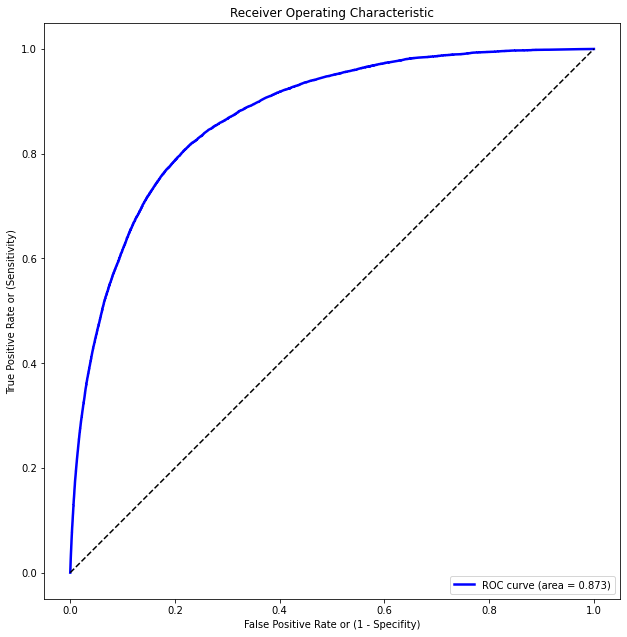

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
from sklearn import metrics


# Compute fpr, tpr, thresholds and roc auc
y_test = np.array(y_test)
y_predicted = np.array(y_pre      0.50    739979
weighted avg       0.97      0.76      0.8d)
fpr, tpr, thresholds = roc_curve(y_test, y_predicted)

auc_purchase = roc_auc_score(y_test, y_predicted)
# Plot ROC curve

plt.figure(figsize=(10,10))
plt.margins(1000.2,1.2)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % auc_purchase,color="blue", linewidth=2.5, linestyle="-")
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

print('AUC = %f, Gini = %f' % (auc_purchase, 2*auc_purchase - 1))

# plt.plot(purchase_fpr, purchase_tpr,"rv",linewidth=4., marker="o",  markersize=10)

plot_margin = 0.05

x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin,
          x1 + plot_margin,
          y0 - plot_margin,
          y1 + plot_margin))

plt.savefig("baseline_first_stage.pdf")

## Second Stage

In [11]:
X_train = np.load("what_to_buy/X_train.npy",allow_pickle=True)
y_train = np.load("what_to_buy/y_train.npy",allow_pickle=True)

In [12]:
X_valid = np.load("what_to_buy/X_valid.npy",allow_pickle=True)
y_valid = np.load("what_to_buy/y_valid.npy",allow_pickle=True)

In [13]:
X_test = np.load("what_to_buy/X_test.npy",allow_pickle=True)
y_test = np.load("what_to_buy/y_test.npy",allow_pickle=True)

In [ ]:
X_pred_test = np.load("what_to_buy/X_pred_test.npy",allow_pickle=True)
y_pred_test = np.load("what_to_buy/y_pred_test.npy",allow_pickle=True)

In [14]:
def flat_list(l):
  return np.array([item for sublist in l for item in sublist])


In [15]:
X_valid = flat_list(X_valid)
y_valid = flat_list(y_valid)

In [16]:
X_train = flat_list(X_train)
y_train = flat_list(y_train)


X_train.shape

(770992, 9)

In [17]:
X_test = flat_list(X_test)
y_test = flat_list(y_test)
X_test.shape

(85646, 9)

In [18]:
X_test[0]

array([8.4100000e+02, 2.1471693e+08, 1.0000000e+00, 0.0000000e+00,
       3.0000000e+00, 3.1000000e+01, 5.2000000e-02, 4.0000000e+00,
       1.7000000e+01])

In [19]:
y_pred_test

NameError: ignored

In [ ]:
X_pred_test = flat_list(X_pred_test)
y_pred_test = flat_list(y_pred_test)

In [20]:
X_train = X_train[:,2:] # remove session id, item_id

In [21]:
X_valid = X_valid[:,2:] # remove session id, item_id

In [22]:
# X_test = X_test[:,2:] # remove session id, item_id

In [23]:
X_test.shape

(85646, 9)

In [28]:
from sklearn.ensemble import *
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  *

import xgboost as xgb

min_samples = [100,150,200,250,300,350,400,500]

best_f1 = 0
best_model = None
for mins in min_samples:
  rnd = RandomForestRegressor(min_samples_split=mins)
  rnd.fit(X_train, y_train)

  y_pred = rnd.predict(X_valid)
  f1_s = f1_score(y_valid, y_pred > 0.5)
  print("Found f1-score",f1_s)

  if f1_s > best_f1:
    print("Found best with min",mins)
    best_model = rnd
    best_f1 = f1_s

print("Best_f1",best_f1)

Found f1-score 2.3217298435154086e-05
Found best with min 100
Found f1-score 2.3217298435154086e-05
Found f1-score 2.3217298435154086e-05
Found f1-score 2.3217298435154086e-05
Found f1-score 2.3217298435154086e-05
Found f1-score 2.3217298435154086e-05
Found f1-score 2.3217298435154086e-05
Found f1-score 2.3217298435154086e-05
Best_f1 2.3217298435154086e-05


In [37]:
X_stk = np.vstack((X_train,X_valid))
y_stk = np.hstack((y_train,y_valid))
print(X_stk.shape)
print(y_stk.shape)

(900206, 7)
(900206,)


In [46]:
param_grid = { 
    'n_estimators': [100, 200, 500],
    # 'max_features': ['auto', 'sqrt', 'log2'],
    # 'max_depth' : [4,5,6,7,8],
    'min_samples_split' : [100,200,300,400,500],
    # 'criterion' :['gini', 'entropy']
}

rnd = RandomForestClassifier(min_samples_split=mins)
best_model = GridSearchCV(estimator=rnd, param_grid=param_grid, cv= 5,n_jobs=40,verbose=300)
best_model.fit(X_stk, y_stk)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done   2 out of  75 | elapsed:  3.3min remaining: 119.8min
[Parallel(n_jobs=40)]: Done   3 out of  75 | elapsed:  3.3min remaining: 79.4min
[Parallel(n_jobs=40)]: Done   4 out of  75 | elapsed:  3.3min remaining: 59.2min
[Parallel(n_jobs=40)]: Done   5 out of  75 | elapsed:  3.3min remaining: 46.7min
[Parallel(n_jobs=40)]: Done   6 out of  75 | elapsed:  3.3min remaining: 38.4min
[Parallel(n_jobs=40)]: Done   7 out of  75 | elapsed:  3.3min remaining: 32.5min
[Parallel(n_jobs=40)]: Done   8 out of  75 | elapsed:  3.4min remaining: 28.1min
[Parallel(n_jobs=40)]: Done   9 out of  75 | elapsed:  3.4min remaining: 25.0min
[Parallel(n_jobs=40)]: Done  10 out of  75 | elapsed:  3.4min remaining: 22.2min
[Parallel(n_jobs=40)]: Done  11 out of  75 | elapsed:  3.5min remainin

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=500,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ran

In [47]:
second_model = best_model

In [48]:
from sklearn.metrics import *
thresholds = list(range(1,20))
best_f1 = 0
best_thres = 0
for thres in thresholds:
  y_pred = best_model.predict(X_valid) > thres*0.05
  f1_s = f1_score(y_valid, y_pred)
  print(f1_s)


  if f1_s > best_f1:
    print("\tfound best for thres", thres*0.05)
    best_f1 = f1_s
    best_thres = thres*0.05


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [52]:
y_pred = second_model.predict(X_valid)

NotFittedError: ignored

In [ ]:
print(classification_report(y_valid, y_pred, target_names=['non_buyer','buyer']))

In [53]:
session_ids_test = X_test[:,[0,1]]
session_ids_test

array([[8.41000000e+02, 2.14716930e+08],
       [8.41000000e+02, 2.14716935e+08],
       [8.41000000e+02, 2.14832653e+08],
       ...,
       [1.15618680e+07, 2.14854787e+08],
       [1.15618680e+07, 2.14854840e+08],
       [1.15618680e+07, 2.14855016e+08]])

In [54]:
session_ids_pred_test = X_pred_test[:,[0,1]]
session_ids_pred_test

NameError: ignored

In [55]:
print(best_thres)
y_pred = best_model.predict(X_test[:,2:]) 
res = classification_report(y_test, y_pred)
with open('baseline_second_stage.txt', 'w') as f:
    print(res, file=f)  # Python 3.x
print(res)

0
              precision    recall  f1-score   support

       False       0.73      0.84      0.78     46404
        True       0.76      0.63      0.69     39242

    accuracy                           0.74     85646
   macro avg       0.74      0.73      0.73     85646
weighted avg       0.74      0.74      0.74     85646



In [ ]:
X_valid[0].shape

(9,)

In [ ]:
y_pred = best_model.predict(X_pred_test)
res = classification_report(y_pred_test, y_pred)
with open('baseline_second_stage_pred.txt', 'w') as f:
    print(res, file=f)  # Python 3.x
print(res)

              precision    recall  f1-score   support

       False       0.98      0.63      0.77    584510
        True       0.11      0.75      0.19     34101

    accuracy                           0.64    618611
   macro avg       0.54      0.69      0.48    618611
weighted avg       0.93      0.64      0.73    618611





```
              precision    recall  f1-score   support

   non_buyer       0.72      0.81      0.76     50545
       buyer       0.76      0.67      0.71     47444

    accuracy                           0.74     97989
   macro avg       0.74      0.74      0.74     97989
weighted avg       0.74      0.74      0.74     97989
```



In [ ]:
item_predicted = y_pred
item_actual = y_test

In [ ]:
jaccard =  item_predicted & item_actual
score_jaccard = sum(jaccard)
print(score_jaccard)

25626


In [ ]:
from collections import Counter
Counter(y_pred)

Counter({False: 51866, True: 33780})

AUC = 0.741170, Gini = 0.482340


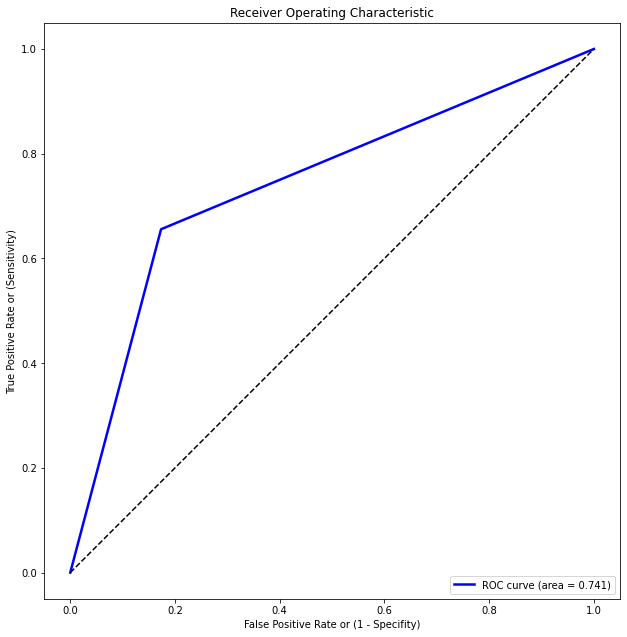

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
from sklearn import metrics


# Compute fpr, tpr, thresholds and roc auc
y_test = np.array(y_test)
y_predicted = np.array(y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_predicted)

auc_purchase = roc_auc_score(y_test, y_predicted)
# Plot ROC curve

plt.figure(figsize=(10,10))
plt.margins(1000.2,1.2)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % auc_purchase,color="blue", linewidth=2.5, linestyle="-")
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

print('AUC = %f, Gini = %f' % (auc_purchase, 2*auc_purchase - 1))

# plt.plot(purchase_fpr, purchase_tpr,"rv",linewidth=4., marker="o",  markersize=10)

plot_margin = 0.05

x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin,
          x1 + plot_margin,
          y0 - plot_margin,
          y1 + plot_margin))

plt.savefig("baseline_second_stage.pdf")

### Evaluate

#### X_test

In [ ]:
sid_test = X_test[:,[0,1]]

sid_items_pred = np.hstack((sid_test,item_actual.reshape(-1,1), y_pred.reshape(-1,1)))
sid_items_pred

array([[8.41000000e+02, 2.14716930e+08, 1.00000000e+00, 1.00000000e+00],
       [8.41000000e+02, 2.14716935e+08, 0.00000000e+00, 0.00000000e+00],
       [8.41000000e+02, 2.14832653e+08, 1.00000000e+00, 1.00000000e+00],
       ...,
       [1.15618680e+07, 2.14854787e+08, 1.00000000e+00, 1.00000000e+00],
       [1.15618680e+07, 2.14854840e+08, 0.00000000e+00, 1.00000000e+00],
       [1.15618680e+07, 2.14855016e+08, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
df = pd.DataFrame(sid_items_pred,columns=['sid','items', 'item_actual','item_pred'])
df.tail(2)

sid        items  item_actual  item_pred
85644  11561868.0  214854840.0          0.0        1.0
85645  11561868.0  214855016.0          0.0        0.0

In [ ]:
jacc_by_size = dict()
sid_sizes = dict()
def get_jaccard(x):
  predicted = set(np.where(x['item_pred']==1)[0])
  actual = set(np.where(x['item_actual']==1)[0])

  inter = len(predicted.intersection(actual))
  union = len(predicted.union(actual))
  jaccard = inter/union

  sid = x['sid'].values[0]

  s_len = len(x['item_actual'])
  sid_sizes[sid] = s_len

  if s_len > 1:
    if s_len in jacc_by_size:
      jacc_by_size[s_len] = (jacc_by_size[s_len]+jaccard)/2.0
    else:
      jacc_by_size[s_len] = jaccard

  return jaccard 

def larger_than_one(x):
  res = len(x)  > 1
  return res


# lto_d = df.groupby("sid").item_pred.apply(lambda x: larger_than_one(x)).to_dict()
jaccard_df = df.groupby("sid").apply(lambda x: get_jaccard(x))
jaccard_df

sid
841.0         1.000000
1253.0        1.000000
1812.0        1.000000
2012.0        0.750000
2153.0        0.000000
                ...   
11561448.0    1.000000
11561554.0    1.000000
11561703.0    0.600000
11561717.0    0.142857
11561868.0    0.666667
Length: 18586, dtype: float64

In [ ]:
jaccard_total = jaccard_df.sum()
jaccard_total

12376.974823448005

In [ ]:
jaccard_max = len(df.groupby('sid'))
jaccard_max

18586

In [ ]:
jacc_by_size

{2: 0.47323383686505804,
 3: 0.20358609924709772,
 4: 0.5060877114731899,
 5: 0.6350309826514029,
 6: 0.6720014754061887,
 7: 0.5934106540805328,
 8: 0.6072693926867617,
 9: 0.3436029500514849,
 10: 0.34455720906387977,
 11: 0.2878651447808732,
 12: 0.34614185399770503,
 13: 0.37384654232802406,
 14: 0.49399903604043754,
 15: 0.5666078756659184,
 16: 0.18404209612624306,
 17: 0.1534936336862064,
 18: 0.2992453769968484,
 19: 0.1994409631396878,
 20: 0.3123922567954617,
 21: 0.1978505899866959,
 22: 0.09977755168124275,
 23: 0.3969356177024428,
 24: 0.15311864272483816,
 25: 0.2713166253229382,
 26: 0.3164506014412768,
 27: 0.23257829410173161,
 28: 0.37908042478354975,
 29: 0.2111352623071373,
 30: 0.23659417839105337,
 31: 0.43797348484848486,
 32: 0.28404251998001995,
 33: 0.1675547542735043,
 34: 0.1500424271908647,
 35: 0.4375,
 36: 0.4021291208791209,
 37: 0.14883241758241758,
 38: 0.24285714285714285,
 39: 0.2,
 40: 0.225,
 41: 0.12878787878787878,
 42: 0.2906130268199234,
 43: 0

- Use the formula p > (v/(jac+2v))

In [ ]:
jacc_sid = jaccard_df.to_dict()

dec_thres = {}

v = 0.0551

for sid,jacc in jacc_sid.items():
  session_size = sid_sizes[sid]
  is_lto = session_size > 1
  if is_lto:
    avg_jac = jacc_by_size[session_size]

    if session_size in jacc_by_size and avg_jac != 0.0:
      dec_thres[session_size] = (v/avg_jac+2*v)
    else:
      dec_thres[session_size] = 0.5
  else:
    dec_thres[session_size] = 0.0496

dec_thres

{1: 0.0496,
 2: 0.22663292534830237,
 3: 0.3808471620791934,
 4: 0.21907440803414754,
 5: 0.19696742002405082,
 6: 0.19219386759782786,
 7: 0.20305306831131192,
 8: 0.20093403116237965,
 9: 0.27055950794876443,
 10: 0.27011538865113294,
 11: 0.30160907122306474,
 12: 0.2693832925248194,
 13: 0.25758667811899577,
 14: 0.22173867918780646,
 15: 0.2074453832118774,
 16: 0.4095880267599449,
 17: 0.46917254287850985,
 18: 0.2943298286809634,
 19: 0.38647223180529944,
 20: 0.2865808122685853,
 21: 0.3886929779774986,
 22: 0.6624284228423124,
 23: 0.24901344364844819,
 24: 0.4700516746195135,
 25: 0.3132837584479628,
 26: 0.2843188032161943,
 27: 0.34710946832682,
 28: 0.25555174173517775,
 29: 0.3711701449104524,
 30: 0.34308823239314146,
 31: 0.2360067027027027,
 32: 0.304185041408152,
 33: 0.4390477264575778,
 34: 0.4774294632364809,
 35: 0.23614285714285715,
 36: 0.24722066609735271,
 37: 0.48041504383940936,
 38: 0.3370823529411765,
 39: 0.38570000000000004,
 40: 0.3550888888888889,
 41:

In [ ]:
import pickle

pickle.dump(dec_thres, open("dec_thres.bin","wb+"))

#### X_pred_test

In [ ]:
sid_test = X_pred_test[:,[0,1]]
y_pred = best_model.predict(X_pred_test)
sid_items_pred = np.hstack((sid_test,y_pred_test.reshape(-1,1), y_pred.reshape(-1,1)))
sid_items_pred

array([[3.80000000e+01, 2.14652878e+08, 0.00000000e+00, 1.00000000e+00],
       [3.80000000e+01, 2.14716737e+08, 0.00000000e+00, 0.00000000e+00],
       [5.40000000e+01, 2.14716939e+08, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.15619680e+07, 2.14859915e+08, 0.00000000e+00, 1.00000000e+00],
       [1.15621390e+07, 2.14859242e+08, 0.00000000e+00, 1.00000000e+00],
       [1.15621540e+07, 2.14853075e+08, 0.00000000e+00, 1.00000000e+00]])

In [ ]:
df = pd.DataFrame(sid_items_pred,columns=['sid','items', 'item_actual','item_pred'])
df.tail(2)

sid        items  item_actual  item_pred
618609  11562139.0  214859242.0          0.0        1.0
618610  11562154.0  214853075.0          0.0        1.0

In [ ]:
from collections import defaultdict

solution_dat = defaultdict(list)

for index,row in df.iterrows():
  sid = row['sid']
  item = row['items']

  solution_dat[sid].append(item)

solution_dat

defaultdict(list,
            {38.0: [214652878.0, 214716737.0],
             54.0: [214716939.0, 214716977.0, 214819468.0],
             78.0: [214509133.0,
              214509135.0,
              214536853.0,
              214678477.0,
              214716982.0,
              214717877.0,
              214826615.0],
             82.0: [214546097.0, 214684093.0, 214685621.0, 214685623.0],
             113.0: [214717847.0, 214748336.0, 214819719.0],
             198.0: [214826803.0],
             308.0: [214602268.0],
             321.0: [214539262.0,
              214706432.0,
              214706460.0,
              214821028.0,
              214821030.0],
             334.0: [214820240.0],
             359.0: [214839313.0],
             514.0: [214826623.0],
             517.0: [214573001.0],
             534.0: [214839313.0, 214839995.0, 214839997.0, 214840001.0],
             563.0: [214711078.0, 214711082.0],
             589.0: [214668249.0,
              214718160.0,
         

In [ ]:
import pickle

solution_dat_string = []


for key,values in solution_dat.items():
  values = [str(int(v)) for v in values]
  s2 = ",".join(values)
  s = str(int(key))+";"+s2
  solution_dat_string.append(s)

text_file = open("baseline_solution.dat", "w")
text_file.write('\n'.join(solution_dat_string))
text_file.close()

In [ ]:
 
# lto_d = df.groupby("sid").item_pred.apply(lambda x: larger_than_one(x)).to_dict()
jaccard_df = df.groupby("sid").apply(lambda x: get_jaccard(x))
jaccard_df

ZeroDivisionError: ignored

In [ ]:
jaccard_total = jaccard_df.sum()
jaccard_total

12376.974823448005

In [ ]:
jaccard_max = len(df.groupby('sid'))
jaccard_max

166932

# RecSys Score

In [ ]:
purchase_tp = (purchase_actual & purchase_predicted).sum()
purchase_fp = ((1 - purchase_actual) & purchase_predicted).sum() 
score_tpfp = (float(purchase_actual.sum()) / purchase_actual.shape[0]) * (purchase_tp - purchase_fp)
score = score_tpfp + jaccard_total

purchase_max_tp = purchase_actual.sum()
purchase_max_fp = 0
score_max_tpfp = (float(purchase_actual.sum()) / purchase_actual.shape[0]) * (purchase_max_tp - purchase_max_fp)
score_max_jaccard = jaccard_max
score_max = score_max_tpfp + score_max_jaccard



recsys1 = ("Max achievable score: %10.2f = %.2f (max purchase) + %10.2f (max jaccard)" % (\
    score_max, score_max_tpfp, score_max_jaccard))
recsys2 = ("Score gained: %10.2f = %.2f (purchase) + %10.2f (jaccard)" % (\
    score, score_tpfp, jaccard_total))
recsys3= ('Gained percent: %.2f%%' % (score / score_max * 100))



with open('baseline_recsys_max.txt', 'w') as f:
    print(report,file=f)  # Python 3.x
print(report)


NameError: ignored

Max achievable score:   23904.78 = 587.78 (max purchase) +   23317.00 (max jaccard)
Score gained:   11297.54 = -4369.33 (purchase) +   15666.87 (jaccard)
Gained percent: 47.26%

In [ ]:
 predicted_sessions = SIT_test[np.where(y_pred)[0]]